   Deprivation Rank  Distance betas    Jobs  Perc Cath Diff  \
0            0.3641         -1.4815 -0.1501         -0.1067   
1            0.1518         -1.9046  0.0589         -0.0311   
2            0.7984         -2.0200 -0.0433          0.0587   
3            0.7350         -1.7467 -0.0671          0.0911   
4            0.4114         -1.4969 -0.0553         -0.2118   

   Perc Households No Car  Perc NSEC 1-3  Pop Dens  Road Dist to Emp Centre  \
0                  0.1519        -1.3311   -0.2932                  -0.2072   
1                 -0.1150        -0.7683   -0.1915                  -0.0069   
2                  0.1769        -2.2114   -0.3557                   0.0620   
3                 -0.1882        -1.8147   -0.1038                   0.4279   
4                  0.1150        -0.4294   -0.2440                  -0.2773   

   Workers  pseudoR2  
0   3.3268    0.3491  
1   3.3431    0.6056  
2   1.5620    0.5925  
3   0.7238    0.5439  
4   0.8813    0.3902  
[[-8.033

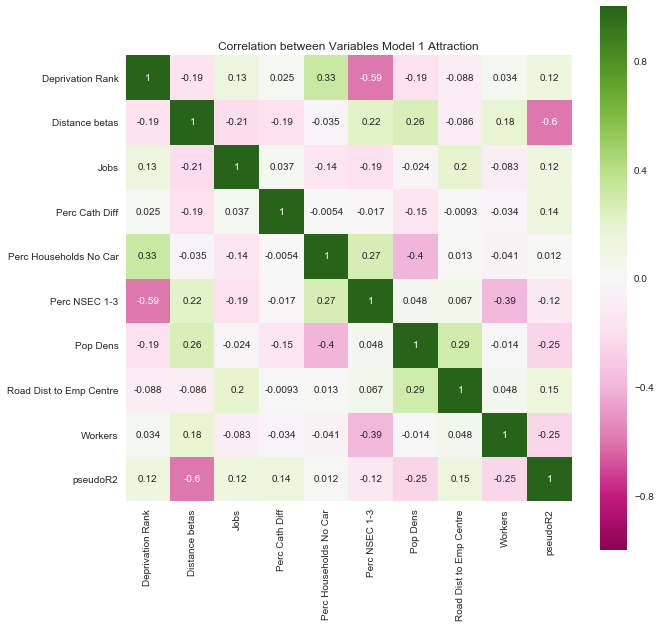

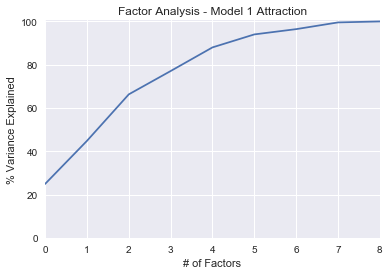

In [61]:
#https://www.kaggle.com/nirajvermafcb/principal-component-analysis-with-scikit-learn
%load_ext rpy2.ipython
from sklearn import decomposition, preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
#import plotly.plotly as py
#from plotly.graph_objs import *
#import plotly.tools as tls
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)

#SIMdata = pd.read_csv('C:/Lorraine/OUTPUTS/FINAL_FINAL_OUTPUTS/JOIN_TABLES/ALL_soa_spintg_rdlen_localproduction_pow_AdditionalFinal.csv', index_col=0)
SIMdata = pd.read_csv('C:/Lorraine/OUTPUTS/FINAL_FINAL_OUTPUTS/JOIN_TABLES/ALL_soa_spintg_rdlen_localattraction_pow_AdditionalFinal.csv', index_col=0)
SIMdata = SIMdata.drop(columns=['Destination'])

print SIMdata.head()
data_normal = preprocessing.scale(SIMdata) # Normalization
fa = decomposition.FactorAnalysis(n_components=9)
fa.fit(data_normal)
print fa.components_ # Factor loadings
print fa.score
#for score in fa.score_samples(data_normal):
    #print score 
    
#pca_scores = [], 
#for n in n_components:
        #fa.n_components = n
        #fa_scores.append(np.mean(cross_val_score(fa, X)))

#return  fa_scores 

covar = fa.get_covariance()
print covar

SIMdata.corr()
correlation = SIMdata.corr()
plt.figure(figsize=(10,10))
#sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='PiYG')
#sns.heatmap(covar, vmax=1, square=True,annot=True,cmap='viridis')
#sns.heatmap(covar, vmax=1, square=True,annot=True,cmap='PiYG')
#plt.title('Correlation between Variables Model 1 Production')
plt.title('Correlation between Variables Model 1 Attraction')
#plt.savefig('C:/Lorraine/OUTPUTS/FINAL_FINAL_OUTPUTS/FACTOR_ANALYSIS/AllSOA_PROD_fa_corrmatrix.png')
plt.savefig('C:/Lorraine/OUTPUTS/FINAL_FINAL_OUTPUTS/FACTOR_ANALYSIS/AllSOA_ATTRACT_fa_corrmatrix.png')

#https://stackoverflow.com/questions/41388997/factor-analysis-in-sklearn-explained-variance/42224525
m = fa.components_ #components matrix
n = fa.noise_variance_ #noise variance
m1 = m**2 #matrix squared
m2 = np.sum(m1,axis=1) #sum of each of the columns of m1
pvar1 = (100*m2[0])/np.sum(m2) # % variance of 1st factor
pvar2 = (100*m2[1])/np.sum(m2) # % variance of 2nd factor
pvar3 = (100*m2[2])/np.sum(m2) # % variance of 3rd factor
pvar4 = (100*m2[3])/np.sum(m2) # % variance of 4th factor
pvar5 = (100*m2[4])/np.sum(m2) # % variance of 5th factor
pvar6 = (100*m2[5])/np.sum(m2) # % variance of 5th factor
pvar7 = (100*m2[6])/np.sum(m2) # % variance of 5th factor
pvar8 = (100*m2[7])/np.sum(m2) # % variance of 5th factor
pvar9 = (100*m2[8])/np.sum(m2) # % variance of 5th factor
Totalvar = pvar1 + pvar2 + pvar3 + pvar4 + pvar5 + pvar6 + pvar7 + pvar8 + pvar9
print pvar1
print pvar2
print pvar3
print pvar4
print pvar5
print pvar6
print pvar7
print pvar8
print pvar9
print Totalvar
#print "Total variance = " & Totalvar

#covar = fa.get_covariance()
#print covar

pvar1_with_noise = (100*m2[0])/(np.sum(m2)+np.sum(n))
pvar2_with_noise = (100*m2[1])/(np.sum(m2)+np.sum(n))
#print pvar1_with_noise
#print pvar2_with_noise


cumvar12 = pvar1 + pvar2
cumvar123 = cumvar12 + pvar3
cumvar1234 = cumvar123 + pvar4
cumvar12345 = cumvar1234 + pvar5
cumvar123456 = cumvar12345 + pvar6
cumvar1234567 = cumvar123456 + pvar7
cumvar12345678 = cumvar1234567 + pvar8
cumvar123456789 = cumvar12345678 + pvar9
list=[[pvar1,cumvar12,cumvar123,cumvar1234,cumvar12345,cumvar123456,cumvar1234567,cumvar12345678,cumvar123456789]]
print list
#df_cumsum['cumsum'] = pd.DataFrame(list)
#df.cumsum = df.cumsum.astype(float)

#var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
#var #cumulative sum of variance explained with [n] features
plt.figure()
plt.ylabel('% Variance Explained')
plt.xlabel('# of Factors')
plt.title('Factor Analysis - Model 1 Attraction')
plt.ylim(0,100.5)
plt.xlim(0,8)
plt.style.context('seaborn-whitegrid')


plt.plot(list[0])
#plt.plot([24.88537973897402, 44.795067323554306, 66.29793125034129, 77.07520291310749, 88.00484427770904, 94.00632819371336, 96.44516583824482, 99.55061363539564, 100.0])
plt.savefig('C:/Lorraine/OUTPUTS/FINAL_FINAL_OUTPUTS/FACTOR_ANALYSIS/AllSOA_ATTRACT_fa_CumVariation.png')




 